Do your work for this exercise in a python script or a jupyter notebook with the name dataframes.py or dataframes.ipynb.

For several of the following exercises, you'll need to load several datasets using the pydataset library. (If you get an error when trying to run the import below, use pip to install the pydataset package.)

`from pydataset import data`

When the instructions say to load a dataset, you can pass the name of the dataset as a string to the data function to load the dataset. You can also view the documentation for the data set by passing the show_doc keyword argument.

In [133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pydataset import data

All the datasets loaded from the pydataset library will be pandas dataframes.

In [134]:
#1. Copy the code from the lesson to create a dataframe full of student grades.

import pandas as pd
import numpy as np

np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades})

type(df)

pandas.core.frame.DataFrame

In [135]:
#1a. Create a column named passing_english that indicates whether each student has a passing grade in english.

df['passing_english'] = df.english >= 70
df

,name,math,english,reading,passing_english
0,Sally,62,85,80,True
1,Jane,88,79,67,True
2,Suzie,94,74,95,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True
5,John,79,76,93,True
6,Thomas,82,64,81,False
7,Marie,93,63,90,False
8,Albert,92,62,87,False
9,Richard,69,80,94,True


In [136]:
#can check how many students are passing English by
#using the .sum() func to add True bool (1) values
df['passing_english'].sum()

8

In [139]:
#how many students are failing Eng?
(df['passing_english'] == False).sum()

4

In [140]:
#1b. Sort the english grades by the passing_english column. 
# How are duplicates handled?
df.sort_values(by='passing_english')

#after duplicates in pass_english are ordered, then it orders by index
#duplicate values are handled according to the index value, small to large or ascending.
#this is the same behavior seen in SQL

,name,math,english,reading,passing_english
6,Thomas,82,64,81,False
7,Marie,93,63,90,False
8,Albert,92,62,87,False
11,Alan,92,62,72,False
0,Sally,62,85,80,True
1,Jane,88,79,67,True
2,Suzie,94,74,95,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True
5,John,79,76,93,True


In [141]:
#1c. Sort the english grades first by passing_english and then by student name. 
# All the students that are failing english should be first, 
#and within the students that are failing english they should be ordered alphabetically. 
#The same should be true for the students passing english. 
#(Hint: you can pass a list to the .sort_values method)
df.sort_values(by=['passing_english','name'], ascending=[True, True])

#or don't need to specify ascending since True is the default:
# df.sort_values(by=['passing_english','name'])

,name,math,english,reading,passing_english
11,Alan,92,62,72,False
8,Albert,92,62,87,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
4,Ada,77,92,98,True
3,Billy,98,96,88,True
10,Isaac,92,99,93,True
1,Jane,88,79,67,True
5,John,79,76,93,True
9,Richard,69,80,94,True


In [142]:
#1d. Sort the english grades first by passing_english, and then by the actual english grade, similar to how we did in the last step.
df.sort_values(by=['passing_english', 'english'])

,name,math,english,reading,passing_english
8,Albert,92,62,87,False
11,Alan,92,62,72,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
2,Suzie,94,74,95,True
5,John,79,76,93,True
1,Jane,88,79,67,True
9,Richard,69,80,94,True
0,Sally,62,85,80,True
4,Ada,77,92,98,True


In [143]:
#1e. Calculate each students overall grade and add it as a column on the dataframe. 
# The overall grade is the average of the math, english, and reading grades.
df['overall_grade'] = (df.math + df.english + df.reading) / 3
df

,name,math,english,reading,passing_english,overall_grade
0,Sally,62,85,80,True,75.666667
1,Jane,88,79,67,True,78.000000
2,Suzie,94,74,95,True,87.666667
3,Billy,98,96,88,True,94.000000
4,Ada,77,92,98,True,89.000000
5,John,79,76,93,True,82.666667
6,Thomas,82,64,81,False,75.666667
7,Marie,93,63,90,False,82.000000
8,Albert,92,62,87,False,80.333333
9,Richard,69,80,94,True,81.000000


In [145]:
#1e alternate using .loc: to select cols and rows using col labels instead of index position.
#with .loc, the indexing IS inclusive.

#df.loc[row_indexer, column_indexer]

df['overall_average'] = round(df.loc[:, 'math': 'reading'].sum(axis=1) / 3)
#      the colon means "all the rows"
#sum by default is axis = 0
# I have to set my axis=1 to sum all of the columns for each row, grades for each student.
#Divide by 3 and assign this to a new col called overall_grade

In [146]:
df

,name,math,english,reading,passing_english,overall_grade,overall_average
0,Sally,62,85,80,True,75.666667,76.0
1,Jane,88,79,67,True,78.000000,78.0
2,Suzie,94,74,95,True,87.666667,88.0
3,Billy,98,96,88,True,94.000000,94.0
4,Ada,77,92,98,True,89.000000,89.0
5,John,79,76,93,True,82.666667,83.0
6,Thomas,82,64,81,False,75.666667,76.0
7,Marie,93,63,90,False,82.000000,82.0
8,Albert,92,62,87,False,80.333333,80.0
9,Richard,69,80,94,True,81.000000,81.0


In [148]:
#1e alternate using .iloc: to select all rows & cols at index positions
df['overall_avg'] = round(df.iloc[:, 1:4].sum(axis=1) / 3).astype(int)
#set axis=1 for columns to get the total of the columns in each row
df

,name,math,english,reading,passing_english,overall_grade,overall_average,overall_avg
0,Sally,62,85,80,True,75.666667,76.0,76
1,Jane,88,79,67,True,78.000000,78.0,78
2,Suzie,94,74,95,True,87.666667,88.0,88
3,Billy,98,96,88,True,94.000000,94.0,94
4,Ada,77,92,98,True,89.000000,89.0,89
5,John,79,76,93,True,82.666667,83.0,83
6,Thomas,82,64,81,False,75.666667,76.0,76
7,Marie,93,63,90,False,82.000000,82.0,82
8,Albert,92,62,87,False,80.333333,80.0,80
9,Richard,69,80,94,True,81.000000,81.0,81


In [149]:
#2. Load the mpg dataset. Read the documentation for the dataset and use it for the following questions:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [150]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Dataframes have several attributes that are important to be familiar with:

`dtypes`: the data type of each column

`shape`: the number of rows and columns in the dataframe

`columns`: the list of column names

`index`: the labels for each row (usually an autogenerated number)

In [63]:
#2a. How many rows and columns are there?
mpg.shape

#.shape: the # of rows & columns in the dataframe

(234, 11)

In [153]:
print(f'There are {mpg.shape[0]} rows and {mpg.shape[1]} columns in the mpg DataFrame.')
                    #[0] = (234,)              #[1] = (,11)

There are 234 rows and 11 columns in the mpg DataFrame.


In [154]:
#2b. What are the data types of each column?
mpg.dtypes

#dtypes: the data type of each column

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [155]:
#2c. Summarize the dataframe with .info and .describe
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [156]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [67]:
#2d. Rename the cty column to city.
mpg.rename(columns={'cty': 'city'})

,manufacturer,model,displ,year,cyl,trans,drv,city,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [68]:
#2e. Rename the hwy column to highway.
mpg.rename(columns={'hwy': 'highway'})

,manufacturer,model,displ,year,cyl,trans,drv,cty,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [157]:
#store the renamed cols:
mpg = mpg.rename(columns={'cty': 'city', 'hwy': 'highway'})
mpg

#.rename() takes in a dict w/ the key as the original name & value as the new name
#To change the original Dataframe to reflect new col names, either assign to a variable like above

#or set *inplace=True like below:
# mpg.rename(columns={'cty': 'city', 'hwy': 'highway'}, inplace=True)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
#another way to rename col: use .columns attribute to grab col labels
# useful if you want to change many col at once
#go a step further & print out a list of current col in Dataframe by adding the .tolist() method
#.tolist() method is not necessary but it shows a nice list
#then make any changes to the names in the list & reassign them to df.columns

In [158]:
# Read in fresh data and assign to mpg.

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [159]:
# Return a list of column names to copy and paste.

mpg.columns.tolist()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

In [163]:
# Assign my list of column names back to mpg using the .columns attribute.

mpg.columns = ['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 
               'drv', 'city', 'highway', 'fl', 'class']
mpg
#you can change various col names in here

#mpg.columns = ['manufacturer', 'model', 'displ', 'yr', 'cyl', 'trans', 
#               'drv', 'city', 'highway', 'fl', 'class']

,manufacturer,model,displ,yr,cyl,trans,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [164]:
#2f. Do any cars have better city mileage than highway mileage?
mpg['more_city_mileage'] = mpg['city'] > mpg['highway']
mpg.sort_values(by='more_city_mileage', ascending = False)

#No bc all False

,manufacturer,model,displ,yr,cyl,trans,drv,city,highway,fl,class,more_city_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,False
161,subaru,forester awd,2.5,1999,4,auto(l4),4,18,24,r,suv,False
149,nissan,maxima,3.0,1999,6,manual(m5),f,19,25,r,midsize,False
150,nissan,maxima,3.5,2008,6,auto(av),f,19,25,p,midsize,False
151,nissan,pathfinder 4wd,3.3,1999,6,auto(l4),4,14,17,r,suv,False
...,...,...,...,...,...,...,...,...,...,...,...,...
83,ford,explorer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv,False
84,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup,False
85,ford,f150 pickup 4wd,4.2,1999,6,manual(m5),4,14,17,r,pickup,False
86,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup,False


In [165]:
#2f alternate sol:

# Create a boolean Series or a boolean Mask
bool_series = mpg.city > mpg.highway

# Return a subset of the original DataFrame using the indexing operator.
mpg[bool_series]
#this comes out as an empty dataset

# I can do a quick check to validate my findings above. There are no observations that meet this condition.
bool_series.sum()

0

In [167]:
#2g. Create a column named mileage_difference 
#this col should contain the difference between highway and city mileage for each car.
mpg['mileage_difference'] = mpg.highway - mpg.city
mpg

#or use .assign() method and reassign to my df.
#mpg = mpg.assign(mileage_difference = mpg.highway - mpg.city)
#mpg

,manufacturer,model,displ,yr,cyl,trans,drv,city,highway,fl,class,more_city_mileage,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,False,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,False,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,False,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,False,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,False,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,False,8


In [168]:
#2h. Which car (or cars) has the highest mileage difference?
mpg.sort_values(by='mileage_difference', ascending=False).head(2)
                                                        #.head(2) because the first 2 have max mileage_diff at 12

#or use .nlargest() to get all of the cars with the highest value in mileage_difference.
#mpg.nlargest(1, 'mileage_difference', keep='all')


# Another way: use the `.max()` function to find the max value in the column.
# mpg.mileage_difference.max() --> 12

,manufacturer,model,displ,yr,cyl,trans,drv,city,highway,fl,class,more_city_mileage,mileage_difference
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,False,12
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,False,12


In [169]:
#2i. Which compact class car has the lowest highway mileage? 
compact_cars = mpg[mpg['class'].str.contains('compact')]
compact_cars.sort_values(by=['class', 'highway'], ascending=[True, True]).head(1)


#or create the bool Series or selector for the compact class of cars.
# bool_series = mpg['class'] == 'compact'

#get a subset of compact cars from my mpg DataFrame. 47 rows.
# compacts = mpg[bool_series]

#get the row label(s) with the .nsmallest().
# compacts.nsmallest(1, 'highway', keep='all')

,manufacturer,model,displ,yr,cyl,trans,drv,city,highway,fl,class,more_city_mileage,mileage_difference
220,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact,False,7


In [170]:
#2i contd. The best?
compact_cars.sort_values(by=['class', 'highway'], ascending=[True, False]).head(1)

#or compacts.nlargest(1, 'highway', keep='all')


,manufacturer,model,displ,yr,cyl,trans,drv,city,highway,fl,class,more_city_mileage,mileage_difference
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,False,11


In [174]:
#2j. Create a column named average_mileage that is the mean of the city and highway mileage.
mpg['average_mileage'] = (mpg.city + mpg.highway) / 2
mpg

,manufacturer,model,displ,yr,cyl,trans,drv,city,highway,fl,class,more_city_mileage,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,False,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,False,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,False,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,False,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,False,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,False,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,False,8,22.0


In [175]:
#2k. Which dodge car has the best average mileage?
dodge_cars = mpg[mpg.manufacturer == 'dodge']
dodge_cars.nlargest(1, 'average_mileage', keep='all')

,manufacturer,model,displ,yr,cyl,trans,drv,city,highway,fl,class,more_city_mileage,mileage_difference,average_mileage
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,False,6,21.0


In [177]:
#2k contd.  The worst?
dodge_cars.nsmallest(1, 'average_mileage', keep='all')

,manufacturer,model,displ,yr,cyl,trans,drv,city,highway,fl,class,more_city_mileage,mileage_difference,average_mileage
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,False,3,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,False,3,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,False,3,10.5
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,False,3,10.5


In [178]:
#3. Load the Mammals dataset. Read the documentation for it, and use the data to answer these questions:
data('Mammals', show_doc=True) # view the documentation for the dataset


Mammals

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Garland(1983) Data on Running Speed of Mammals

### Description

Observations on the maximal running speed of mammal species and their body
mass.

### Usage

    data(Mammals)

### Format

A data frame with 107 observations on the following 4 variables.

weight

Body mass in Kg for "typical adult sizes"

speed

Maximal running speed (fastest sprint velocity on record)

hoppers

logical variable indicating animals that ambulate by hopping, e.g. kangaroos

specials

logical variable indicating special animals with "lifestyles in which speed
does not figure as an important factor": Hippopotamus, raccoon (Procyon),
badger (Meles), coati (Nasua), skunk (Mephitis), man (Homo), porcupine
(Erithizon), oppossum (didelphis), and sloth (Bradypus)

### Details

Used by Chappell (1989) and Koenker, Ng and Portnoy (1994) to illustrate the
fitting of piecewise linear curves.

### Source

Garland, T. (

In [179]:
mammals = data('Mammals') # load the dataset and store it in a variable
mammals

,weight,speed,hoppers,specials
1,6000.000,35.0,False,False
2,4000.000,26.0,False,False
3,3000.000,25.0,False,False
4,1400.000,45.0,False,False
5,400.000,70.0,False,False
6,350.000,70.0,False,False
7,300.000,64.0,False,False
8,260.000,70.0,False,False
9,250.000,40.0,False,False
10,3800.000,25.0,False,True


In [180]:
#3a. How many rows and columns are there?

mammals.shape

(107, 4)

In [181]:
#3b. What are the data types?
mammals.dtypes

weight      float64
speed       float64
hoppers        bool
specials       bool
dtype: object

In [182]:
#3c. Summarize the dataframe with .info and .describe
mammals.info

<bound method DataFrame.info of        weight  speed  hoppers  specials
1    6000.000   35.0    False     False
2    4000.000   26.0    False     False
3    3000.000   25.0    False     False
4    1400.000   45.0    False     False
5     400.000   70.0    False     False
6     350.000   70.0    False     False
7     300.000   64.0    False     False
8     260.000   70.0    False     False
9     250.000   40.0    False     False
10   3800.000   25.0    False      True
11   1000.000   60.0    False     False
12    900.000   70.0    False     False
13    900.000   56.0    False     False
14    800.000   29.0    False     False
15    750.000   57.0    False     False
16    500.000   32.0    False     False
17    450.000   56.0    False     False
18    300.000   72.0    False     False
19    300.000   90.0    False     False
20    250.000   80.0    False     False
21    250.000   56.0    False     False
22    170.000   80.0    False     False
23    150.000   48.0    False     False
24    13

In [183]:
mammals.describe()

,weight,speed
count,107.000000,107.000000
mean,278.688178,46.208411
std,839.608269,26.716778
min,0.016000,1.600000
25%,1.700000,22.500000
50%,34.000000,48.000000
75%,142.500000,65.000000
max,6000.000000,110.000000


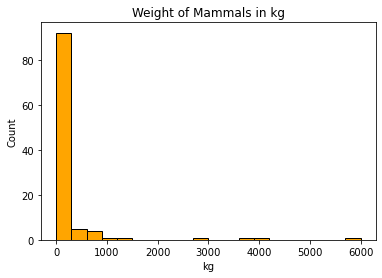

In [184]:
#to visualize distribution of weight and speed:
plt.hist(mammals.weight, bins=20, color='orange', edgecolor='black')

plt.title('Weight of Mammals in kg')
plt.xlabel('kg')
plt.ylabel('Count')

plt.show()

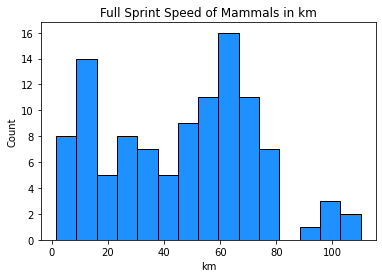

In [185]:
plt.hist(mammals.speed, bins=15, color='dodgerblue', edgecolor='black')

plt.title('Full Sprint Speed of Mammals in km')
plt.xlabel('km')
plt.ylabel('Count')

plt.show()

In [186]:
#3d. What is the the weight of the fastest animal?
mammals.sort_values(by='speed', ascending = False).head(1)

#or mammals.nlargest(1, 'speed', keep='all')

,weight,speed,hoppers,specials
53,55.0,110.0,False,False


In [187]:
#3e. What is the overall percentage of specials?
overall_percentage = ((mammals.specials.sum() / len(mammals)) * 100)
overall_percentage


9.345794392523365

In [188]:
#3e alternate sol:
total_specials = mammals.specials.sum()
total_mammals = len(mammals)
round(total_specials / total_mammals * 100, 2)


9.35

In [189]:
print(f'{round(total_specials / total_mammals * 100, 2)}% of mammals in the df are specials.')


9.35% of mammals in the df are specials.


In [191]:
#3f. How many animals are hoppers that are above the median speed? 
mammals[(mammals.hoppers == True) & (mammals.speed > np.median(mammals.speed))]


,weight,speed,hoppers,specials
96,4.6,64.0,True,False
97,4.4,72.0,True,False
98,4.0,72.0,True,False
99,3.5,56.0,True,False
100,2.0,64.0,True,False
101,1.9,56.0,True,False
102,1.5,50.0,True,False


In [192]:
#3f contd. What percentage is this?
hoppers = mammals[mammals.hoppers == True]
above_median_hoppers = hoppers[hoppers.speed > mammals.speed.median()]

(len(above_median_hoppers) / len(mammals) * 100)

6.5420560747663545

In [193]:
#3f alternate sol:
median_speed = mammals.speed.median()
bool_series = (mammals.speed > median_speed) & (mammals.hoppers == True)
fast_hoppers = mammals[bool_series]
round((len(fast_hoppers) / len(mammals)) * 100, 2)


6.54

In [194]:
print(f'This puts fast hoppers at {round((len(fast_hoppers) / len(mammals)) * 100, 2)}% of the mammals.')


This puts fast hoppers at 6.54% of the mammals.
